In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
%matplotlib inline


In [3]:
weather_hist = pd.read_csv('./db/weather_hist.csv',index_col = 'date',encoding = 'gb18030',parse_dates = True)
weather_hist

,weather_am,whether_pm,temp_max,temp_min,temp_mean,wind_am,wind_pm
date,,,,,,,
2011-01-01,晴,晴,0,-9,-4.5,微风,微风
2011-01-02,多云,阴,-2,-7,-4.5,微风,微风
2011-01-03,晴,晴,1,-8,-3.5,北风 3-4级,微风
2011-01-04,晴,晴,-1,-11,-6.0,微风,微风
2011-01-05,晴,晴,-1,-8,-4.5,北风 4-5级,北风 3-4级
2011-01-06,晴,晴,0,-10,-5.0,微风,微风
2011-01-07,晴,多云,1,-7,-3.0,微风,微风
2011-01-08,多云,晴,1,-8,-3.5,北风 4-5级,北风 4-5级
2011-01-09,晴,晴,-1,-10,-5.5,北风 3-4级,微风


In [4]:
feature = ['temp_mean']
tmp = weather_hist[feature].head(10)
tmp

,temp_mean
date,
2011-01-01,-4.5
2011-01-02,-4.5
2011-01-03,-3.5
2011-01-04,-6.0
2011-01-05,-4.5
2011-01-06,-5.0
2011-01-07,-3.0
2011-01-08,-3.5
2011-01-09,-5.5


In [5]:
def derive_nth_day_feature(df, feature, N):  
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature].values.tolist()[i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

In [6]:
features = ['temp_max','temp_min','temp_mean']
for feature in features:  
    if feature != 'date':
        for N in range(1, 4):
            derive_nth_day_feature(weather_hist, feature, N)

In [7]:
# make list of original features without meantempm, mintempm, and maxtempm
old_feature = ['weather_am', 'whether_pm', 'temp_max', 'temp_min', 'temp_mean',
       'wind_am', 'wind_pm']
to_remove = [feature  
             for feature in old_feature 
             if feature not in ['temp_max','temp_min','temp_mean']]

# make a list of columns to keep
to_keep = [col for col in weather_hist.columns if col not in to_remove]

# select only the columns in to_keep and assign to df
weather_hist = weather_hist[to_keep]  
weather_hist.columns

Index(['temp_max', 'temp_min', 'temp_mean', 'temp_max_1', 'temp_max_2',
       'temp_max_3', 'temp_min_1', 'temp_min_2', 'temp_min_3', 'temp_mean_1',
       'temp_mean_2', 'temp_mean_3'],
      dtype='object')

In [8]:
weather_hist = weather_hist.dropna()  

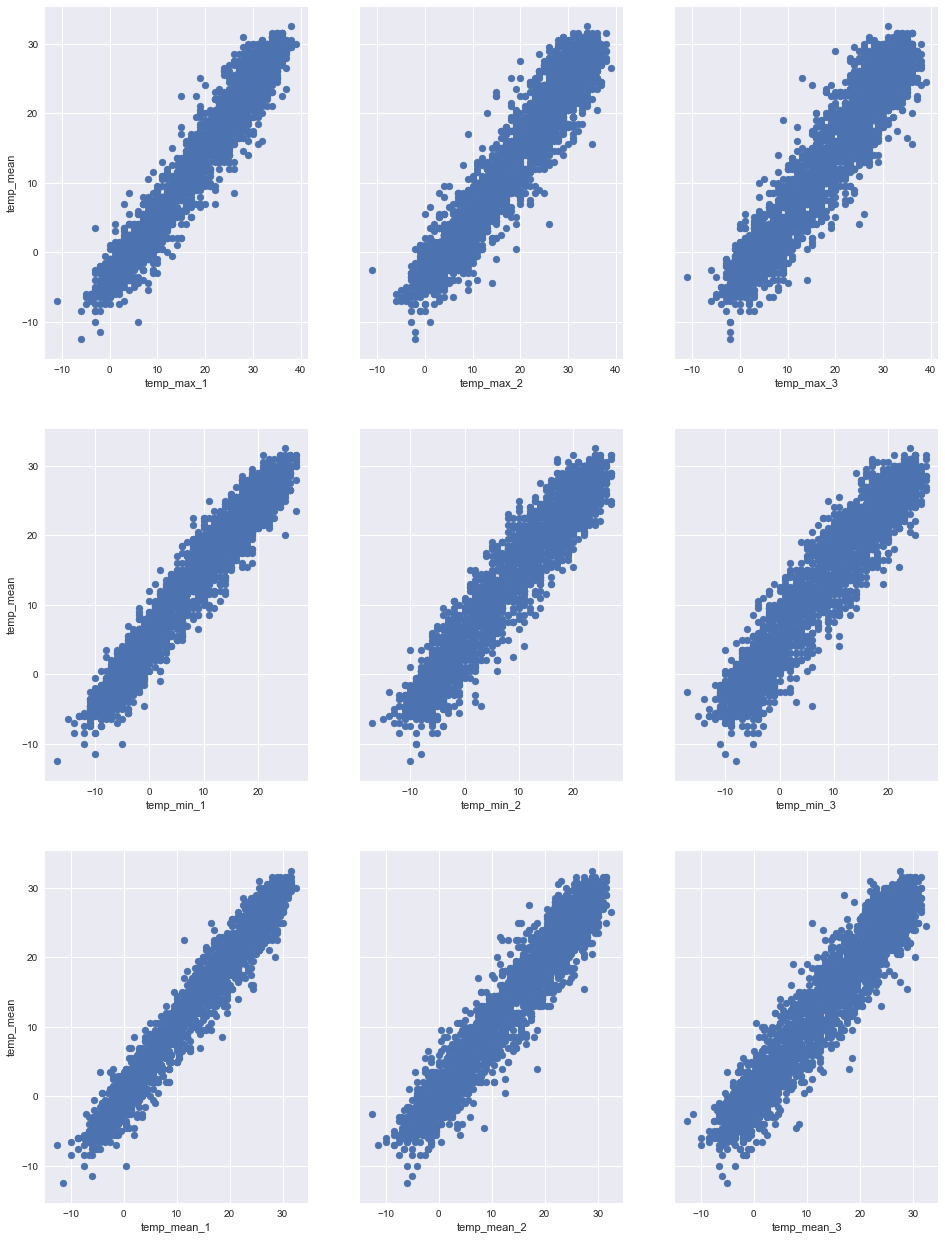

In [9]:
predictors = ['temp_max_1', 'temp_max_2',
       'temp_max_3', 'temp_min_1', 'temp_min_2', 'temp_min_3', 'temp_mean_1',
       'temp_mean_2', 'temp_mean_3']
df = weather_hist[['temp_mean'] + predictors]
plt.rcParams['figure.figsize'] = [16, 22]
fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True)
arr = np.array(predictors).reshape(3, 3)

for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df[feature], df['temp_mean'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='temp_mean')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()

In [10]:
# 对平均温度进行预测
X = df[predictors]  
y_mean = df['temp_mean']

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y_mean, test_size=0.2, random_state=12) 

from sklearn.linear_model import LinearRegression  
regressor_mean = LinearRegression()

regressor_mean.fit(X_train, y_train)

prediction = regressor_mean.predict(X_test)

# 评价模型预测准确性
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("平均绝对误差: %.2f ℃" % mean_absolute_error(y_test, prediction))  
print("中间绝对误差: %.2f ℃" % median_absolute_error(y_test, prediction))


平均绝对误差: 1.59 ℃
中间绝对误差: 1.26 ℃


In [15]:
# 用XGBT预测平均温度
X = df[predictors]  
y_mean = df['temp_mean']

import xgboost as xgb

xgb_model = xgb.XGBClassifier(min_samples_leaf=5)
xgb_model.fit(X_train,y_train)

prediction = xgb_model.predict(X_test)
# 评价模型预测准确性
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("平均绝对误差: %.2f ℃" % mean_absolute_error(y_test, prediction))  
print("中间绝对误差: %.2f ℃" % median_absolute_error(y_test, prediction))

平均绝对误差: 1.86 ℃
中间绝对误差: 1.50 ℃


H:\Program\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
print(regressor_mean.intercept_,regressor_mean.coef_)

0.35366734457171844 [ 0.31952873 -0.00352648 -0.00392863  0.25904725 -0.06803221  0.15459005
  0.28928799 -0.03577935  0.07533071]


In [11]:
# 对最高温度进行预测
X = df[predictors]  
y_max = weather_hist[['temp_max']]

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y_max, test_size=0.2, random_state=12) 

from sklearn.linear_model import LinearRegression  
regressor_max = LinearRegression()

regressor_max.fit(X_train, y_train)

prediction = regressor_max.predict(X_test)

# 评价模型预测准确性
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("平均绝对误差: %.2f ℃" % mean_absolute_error(y_test, prediction))  
print("中间绝对误差: %.2f ℃" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.95
The Mean Absolute Error: 2.08 ℃
The Median Absolute Error: 1.64 ℃


In [12]:
print(regressor_max.intercept_,regressor_max.coef_)

[2.45784405] [[ 0.55262965  0.00564569  0.04678209  0.0603695  -0.1187074   0.11062314
   0.30649958 -0.05653086  0.07870261]]


In [13]:
# 对最低温度进行预测
X = df[predictors]  
y_min = weather_hist[['temp_min']]

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y_min, test_size=0.2, random_state=12) 

from sklearn.linear_model import LinearRegression  
regressor_min = LinearRegression()

regressor_min.fit(X_train, y_train)

prediction = regressor_min.predict(X_test)

# 评价模型预测准确性
from sklearn.metrics import mean_absolute_error, median_absolute_error  
print("平均绝对误差: %.2f ℃" % mean_absolute_error(y_test, prediction))  
print("中间绝对误差: %.2f ℃" % median_absolute_error(y_test, prediction))


The Explained Variance: 0.96
The Mean Absolute Error: 1.66 ℃
The Median Absolute Error: 1.36 ℃


In [14]:
print(regressor_min.intercept_,regressor_min.coef_)

[-1.75050936] [[ 0.08642781 -0.01269866 -0.05463935  0.45772499 -0.01735702  0.19855696
   0.2720764  -0.01502784  0.0719588 ]]


In [15]:
data = {'temp_max_1': -3,
        'temp_max_2':-4,
        'temp_max_3':-6,
        'temp_min_1': -12,
        'temp_min_2':-11,
        'temp_min_3':-12,
        'temp_mean_1':-7.5,
        'temp_mean_2':-7.5,
        'temp_mean_3':-9.0,}

d181230 = pd.DataFrame(data,index = ['2018-12-30'])

In [16]:
d181230

,temp_max_1,temp_max_2,temp_max_3,temp_min_1,temp_min_2,temp_min_3,temp_mean_1,temp_mean_2,temp_mean_3
2018-12-30,-3,-4,-6,-12,-11,-12,-7.5,-7.5,-9.0


In [17]:
regressor_max.predict(d181230)

array([[-2.8325394]])

In [1]:
###
import pymysql
db = pymysql.connect(host="localhost",
                     user="root",
                     password="q1889233",
                     db='weather_data',
                     charset='utf8mb4',
                     cursorclass=pymysql.cursors.DictCursor )

import pandas as pd
df_ora = pd.read_sql('select * from weather_data2 ORDER BY time DESC LIMIT 3', con=db) 
db.close()

In [29]:
import pymysql
db = pymysql.connect(host="localhost",
                     user="root",
                     password="q1889233",
                     db='weather_data',
                     charset='utf8mb4',
                     cursorclass=pymysql.cursors.DictCursor )

col_names = ['*']
table = 'weather_data2'
limit = 3

query_temp = "SELECT {} FROM {} ORDER  BY `time` DESC LIMIT {}"
pre_statement = query_temp.format(','.join(col_names), table, limit)

with db.cursor() as cursor:
    cursor.execute(pre_statement)
    result=cursor.fetchall()
    print(result)
    db.close()

[{'id': 10, 'name': '北京', 'time': datetime.datetime(2019, 1, 6, 0, 0), 'weather': '晴', 'max_temp': 3, 'min_temp': -7, 'cur_temp': -5, 'humidity': 37, 'wind_dir': '东', 'wind_power': 1, 'rays': 3, 'pm': 29}, {'id': 9, 'name': '北京', 'time': datetime.datetime(2019, 1, 5, 0, 0), 'weather': '多云', 'max_temp': 0, 'min_temp': -8, 'cur_temp': -2, 'humidity': 18, 'wind_dir': '东', 'wind_power': 1, 'rays': 0, 'pm': 18}, {'id': 8, 'name': '北京', 'time': datetime.datetime(2019, 1, 4, 0, 0), 'weather': '晴', 'max_temp': 2, 'min_temp': -7, 'cur_temp': -1, 'humidity': 18, 'wind_dir': '西北', 'wind_power': 3, 'rays': 3, 'pm': 14}]


In [2]:
df_ora['mean_temp'] = (df_ora['min_temp']+df_ora['max_temp'])/2

In [3]:
df_ora

,id,name,time,weather,max_temp,min_temp,cur_temp,humidity,wind_dir,wind_power,rays,pm,mean_temp
0,10,北京,2019-01-06,晴,3,-7,-5,37,东,1,3,29,-2.0
1,9,北京,2019-01-05,多云,0,-8,-2,18,东,1,0,18,-4.0
2,8,北京,2019-01-04,晴,2,-7,-1,18,西北,3,3,14,-2.5


In [15]:
weather_next = []

temp_list = ['max_temp','min_temp','mean_temp']
temp_max_1 = df_ora.iloc[0].max_temp
for i in temp_list:
    for j in range(3):
        weather_next.append(df_ora.iloc[j][i])
columns=['temp_max_1', 'temp_max_2', 'temp_max_3','temp_min_1', 'temp_min_2', 'temp_min_3','temp_mean_1', 'temp_mean_2', 'temp_mean_3',]
a = pd.DataFrame(weather_next,index=columns)
a = a.T

In [45]:
today_temp = a.values[0].tolist()

In [49]:
today_temp[0]*para_min[1]

0.25928343

In [52]:
regressorlist = [regressor_min.predict,regressor_max.predict]
para_min = [-1.75050936,0.08642781,-0.01269866,-0.05463935,0.45772499,-0.01735702,0.19855696,0.2720764,-0.01502784,0.0719588]
para_max = [2.45784405,0.55262965,0.00564569,0.04678209,0.0603695,-0.1187074,0.11062314,0.30649958,-0.05653086,0.07870261]

result_min = para_min[0]
result_max = para_max[0]
for i in range(len(today_temp)):
    result_min += (today_temp[i]*para_min[i+1])
    result_max += (today_temp[i]*para_max[i+1])
result_min,result_max

(-6.71956056, 3.3783756549999993)

In [27]:
for i in regressorlist:
    print(i(a))

[[-6.71956057]]
[[3.37837567]]


In [ ]:
[[-1.75050936,0.08642781,-0.01269866,-0.05463935,0.45772499,-0.01735702,0.19855696,0.2720764,-0.01502784,0.0719588],
[-1.75050936,0.08642781,-0.01269866,-0.05463935,0.45772499,-0.01735702,0.19855696,0.2720764,-0.01502784,0.0719588]]

In [ ]:
from sklearn.model_selection import train_test_split